In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [19]:
def create_visualization(df):
    # Group data by 'Model', 'Maximum Support', 'Minimum Support', and 'Number of Samples' and calculate the mean Match Percentage
    grouped_df = df.groupby(['Model', 'Maximum Support', 'Minimum Support', 'Number of Samples'], as_index=False)['Match Percentage'].mean()
    
    # Filter data by model names for the different lines
    models = grouped_df['Model'].unique()
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set up the Viridis colormap
    colormap = plt.cm.viridis
    colors = colormap(np.linspace(0, 1, len(models)))
    
    # Plot each model's data
    for idx, model in enumerate(models):
        model_data = grouped_df[grouped_df['Model'] == model]
        ax.plot(model_data['Number of Samples'], model_data['Match Percentage'], label=model, color=colors[idx])
    
    # Add the title and labels
    ax.set_title('Mean Match Percentage for different number of samples')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Match Percentage')
    
    # Set x-axis ticks
    ax.set_xticks([100, 250, 500, 1000, 2000])
    
    # Format y-axis ticks to show percentage
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    
    # Add a legend
    ax.legend()
    
    return fig, ax

In [14]:
evaluation_path = '../evaluation/'
evaluation_summary_path = f'{evaluation_path}evaluation_summary.csv'

evaluation_summary = pd.read_csv(evaluation_summary_path)

model_name_mapping = {
    'mmsr_se5_newloss': 'fancy-water-85',
    'mmsr_se5_oldloss': 'rich-flower-83',
    'mmsr_se1_oldloss': 'sage-cloud-81',
    'nsr': 'NSR'
}

evaluation_summary['Model'] = evaluation_summary['Model'].replace(model_name_mapping)

In [15]:
minimum_support = -10
support_range = 20
models = ['fancy-water-85', 'rich-flower-83', 'sage-cloud-81', 'NSR']
number_of_samples = [100, 250, 500, 1000, 2000]

evaluation_summary = evaluation_summary[(evaluation_summary['Model'].isin(models)) & 
                           (evaluation_summary['Minimum Support'] == minimum_support) & 
                           (evaluation_summary['Number of Samples'].isin(number_of_samples)) &
                           (evaluation_summary['Maximum Support'] == minimum_support + support_range)]

In [16]:
evaluation_summary.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage,Number of Samples
400,sage-cloud-81,train_nc,1.0,old,-10,10,281,174,61.921708,100.0
401,sage-cloud-81,train_nc,1.0,old,-10,10,281,198,70.462633,500.0
402,sage-cloud-81,train_nc,1.0,old,-10,10,279,198,70.967742,500.0
403,sage-cloud-81,train_nc,1.0,old,-10,10,280,196,70.000000,500.0
404,sage-cloud-81,train_nc,1.0,old,-10,10,281,194,69.039146,500.0


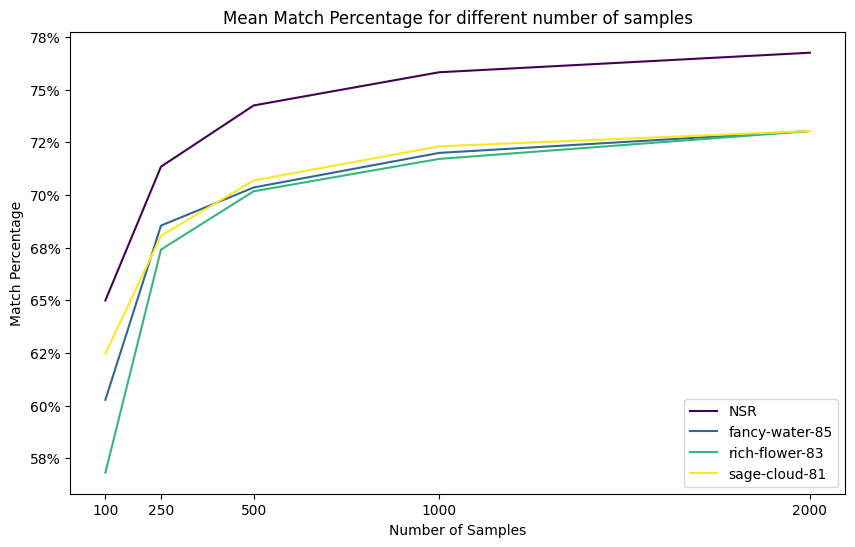

In [20]:
fig, ax = create_visualization(evaluation_summary)
plt.show()